In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"

## Load the data

In [2]:
df_orig = pd.read_csv('/Users/yeong-injang/Desktop/kaggle/Used_cars/used_cars.csv')
df_orig.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
# check total counts, null counts and types of the data
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


The data has 4009 rows with some null values.
Also, it looks like some columns are written with measurement units, which needs to be transformed as numbers.

## Data Preprocessing

In [4]:
df = df_orig.copy()
df['milage'] = df['milage'].apply(lambda x:int(x[:-4].replace(',','')))
df['price'] = df['price'].apply(lambda x:int(x[1:].replace(',','')))
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


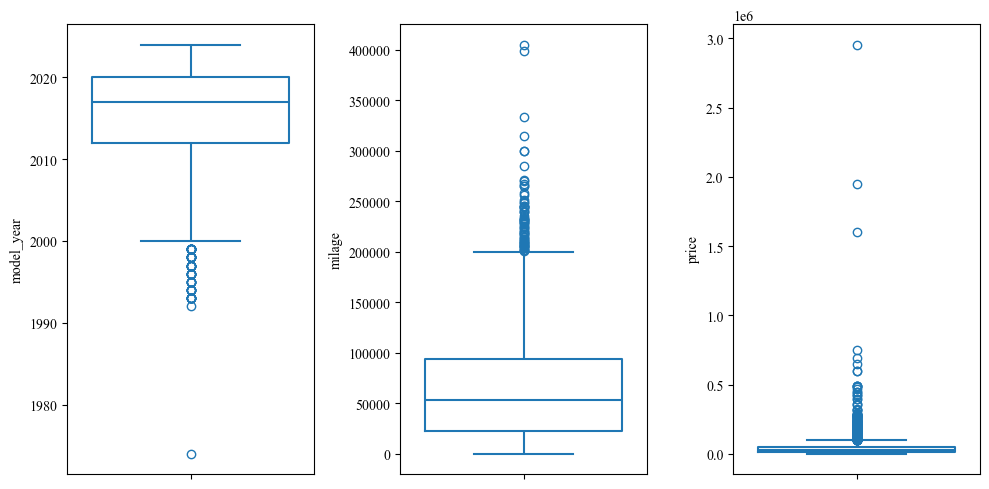

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
sns.boxplot(data = df, y = 'model_year', ax=ax[0], fill=False)
sns.boxplot(y = df['milage'], ax=ax[1], fill=False)
sns.boxplot(y = df['price'], ax=ax[2], fill=False)
plt.tight_layout()

After drawing boxplots, I figured out there are some outliers in numerical columns. I will remove outliers in price and milage with 1.5 IQR Rule.

### outlier handling

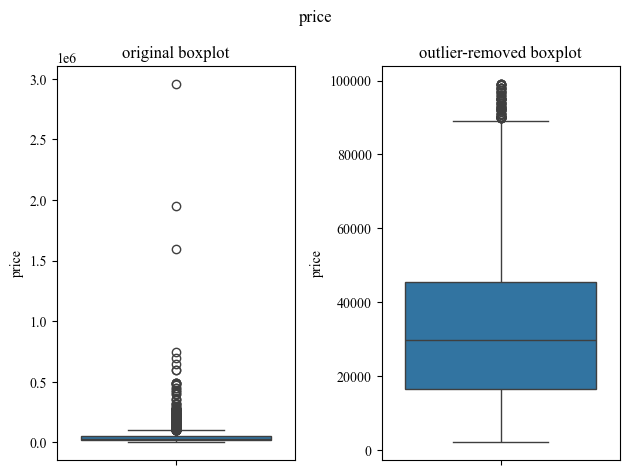

In [6]:
def iqr_outliers(data, col, rng=1.5):
    q3 = np.percentile(data[col],75)
    q1 = np.percentile(data[col],25)
    iqr = q3 - q1
    lower_bound = q1 - rng*iqr
    upper_bound = q3 + rng*iqr
    return(lower_bound, upper_bound)

c = 'price'
fig, ax = plt.subplots(1,2)
sns.boxplot(df[c], ax=ax[0])
sns.boxplot(df[(df[c]>=iqr_outliers(df,c)[0])&(df[c]<iqr_outliers(df,c)[1])][c], ax=ax[1])
ax[0].set_title('original boxplot')
ax[1].set_title('outlier-removed boxplot')
fig.suptitle(c)
plt.tight_layout()
plt.show()

In [7]:
df = df[(df[c]>=iqr_outliers(df,c)[0])&(df[c]<iqr_outliers(df,c)[1])]

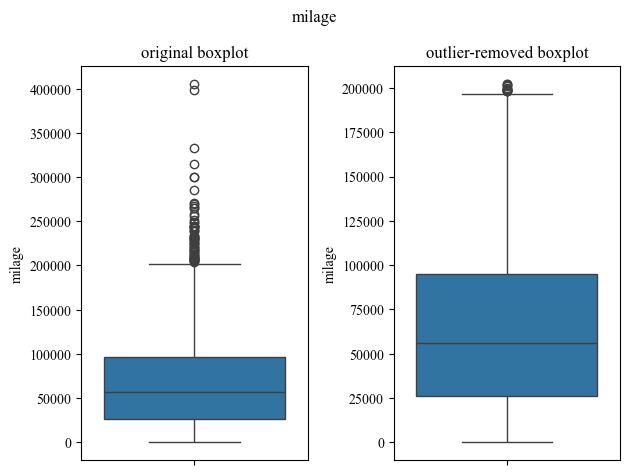

In [8]:
def iqr_outliers(data, col, rng=1.5):
    q3 = np.percentile(data[col],75)
    q1 = np.percentile(data[col],25)
    iqr = q3 - q1
    lower_bound = q1 - rng*iqr
    upper_bound = q3 + rng*iqr
    return(lower_bound, upper_bound)

c = 'milage'
fig, ax = plt.subplots(1,2)
sns.boxplot(df[c], ax=ax[0])
sns.boxplot(df[(df[c]>=iqr_outliers(df,c)[0])&(df[c]<iqr_outliers(df,c)[1])][c], ax=ax[1])
ax[0].set_title('original boxplot')
ax[1].set_title('outlier-removed boxplot')
fig.suptitle(c)
plt.tight_layout()
plt.show()

In [9]:
df = df[(df[c]>=iqr_outliers(df,c)[0])&(df[c]<iqr_outliers(df,c)[1])]

In [10]:
print('Now we have {} rows.'.format(len(df)))

Now we have 3700 rows.


### Feature Extraction

In [11]:
def eng_hp(data, col):
    r = data[col].str.extract(r'([0-9\.]+)[ ]*HP')
    return(r)

def eng_displacement(data, col):
    r = data[col].str.extract(r'([0-9\.])+[ ]*L')
    return(r)

def eng_c(data,col):
    r = data[col].str.extract(r'V([1-9]+)|I([1-9]+)|([1-9]+) Cylinder', expand=False)
    r = r.iloc[:,0].fillna(r.iloc[:,1]).fillna(r.iloc[:,2])
    return(r)

df['engine_hp'] = eng_hp(df, 'engine')
df['engine_displacement'] = eng_displacement(df, 'engine')
df['engine_c'] = eng_c(df, 'engine')
df[['engine_hp','engine_displacement','engine_c']] = df[['engine_hp','engine_displacement','engine_c']].astype(float)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_displacement,engine_c
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,300.0,7.0,6.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,NaN,8.0,6.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,NaN,5.0,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,354.0,5.0,6.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,NaN,0.0,4.0


In [12]:
df['ext_col'] = df['ext_col'].str.replace('Grey','Gray')
df['int_col'] = df['int_col'].str.replace('Grey','Gray')
clr = list(df['ext_col'].value_counts()[:12].index) + ['purple']
clr 

['Black',
 'White',
 'Gray',
 'Silver',
 'Blue',
 'Red',
 'Green',
 'Gold',
 'Brown',
 'Beige',
 'Orange',
 'Yellow',
 'purple']

In [13]:
def find_color(txt, clr):
    for i in clr:
        if i in txt:
            return(i)
    else:
        return('Others')
df['ext_col_norm'] = df['ext_col'].apply(lambda x:find_color(x, clr))
df['int_col_norm'] = df['int_col'].apply(lambda x:find_color(x, clr))
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_displacement,engine_c,ext_col_norm,int_col_norm
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,300.0,7.0,6.0,Black,Black
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,NaN,8.0,6.0,Others,Gray
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,NaN,5.0,NaN,Blue,Black
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,354.0,5.0,6.0,Black,Black
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,NaN,0.0,4.0,White,Black


In [14]:
df['ext_col_norm'].value_counts()

ext_col_norm
Black     937
White     863
Gray      500
Silver    399
Blue      371
Red       284
Others    103
Green      67
Gold       41
Brown      41
Beige      36
Orange     32
Yellow     26
Name: count, dtype: int64

In [15]:
df['int_col_norm'].value_counts()

int_col_norm
Black     2007
Beige      513
Gray       451
Others     257
Brown      153
Red        120
White      118
Blue        29
Orange      19
Silver      16
Gold        10
Green        6
Yellow       1
Name: count, dtype: int64

<Axes: xlabel='int_col_norm', ylabel='ext_col_norm'>

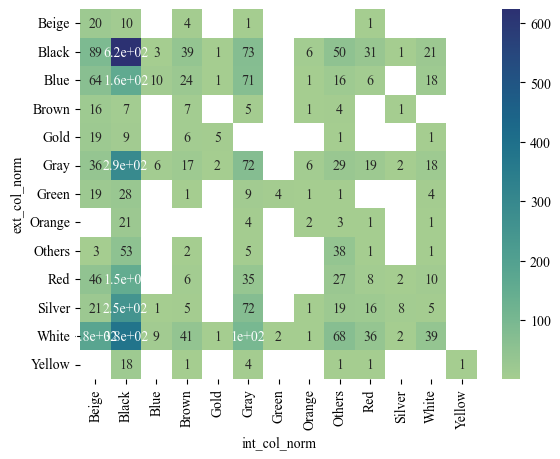

In [16]:
color_mix = pd.pivot_table(data=df, index='ext_col_norm', columns='int_col_norm', values='price', aggfunc='count')
sns.heatmap(color_mix, cmap='crest', annot=True)

Lots of cars have Black and Gray interior, but there is no major combination of colors between exterior and interior.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3700 entries, 0 to 4008
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                3700 non-null   object 
 1   model                3700 non-null   object 
 2   model_year           3700 non-null   int64  
 3   milage               3700 non-null   int64  
 4   fuel_type            3537 non-null   object 
 5   engine               3700 non-null   object 
 6   transmission         3700 non-null   object 
 7   ext_col              3700 non-null   object 
 8   int_col              3700 non-null   object 
 9   accident             3601 non-null   object 
 10  clean_title          3178 non-null   object 
 11  price                3700 non-null   int64  
 12  engine_hp            2993 non-null   float64
 13  engine_displacement  3495 non-null   float64
 14  engine_c             3298 non-null   float64
 15  ext_col_norm         3700 non-null   object

## EDA

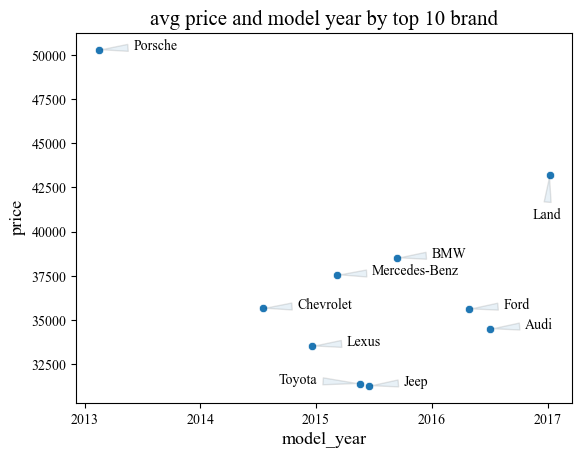

In [18]:
temp = df.groupby('brand').agg({'price':['mean','count'], 'model_year':'mean'}).sort_values([('price','count')], ascending=False)

fig, ax = plt.subplots()
sns.scatterplot(data=temp[:10], y=('price','mean'), x=('model_year','mean'), ax=ax)
for i, nm in enumerate(temp[:10].index):
    if nm == 'Toyota':
        ax.annotate(nm, (temp.iloc[i][('model_year','mean')], temp.iloc[i][('price','mean')]), 
                    xytext=(temp.iloc[i][('model_year','mean')]-0.7, temp.iloc[i][('price','mean')]), 
                    arrowprops = dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1))

    elif nm == 'Land' :
        ax.annotate(nm, (temp.iloc[i][('model_year','mean')], temp.iloc[i][('price','mean')]), 
                    xytext=(temp.iloc[i][('model_year','mean')]-.15, temp.iloc[i][('price','mean')]-2500), 
                    arrowprops = dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1))
            
    else:
        ax.annotate(nm, (temp.iloc[i][('model_year','mean')], temp.iloc[i][('price','mean')]), 
                    xytext=(temp.iloc[i][('model_year','mean')]+0.3, temp.iloc[i][('price','mean')]), 
                    arrowprops = dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1))
plt.ylabel('price', fontsize=13)
plt.xlabel('model_year', fontsize=13)
plt.xticks(np.arange(2013,2018))
plt.title('avg price and model year by top 10 brand', fontsize=15)
plt.show()

Obviously, Porsche has a significantly higher price compared to other brands. 

In contrast, Toyota and Jeep have relatively lower prices.

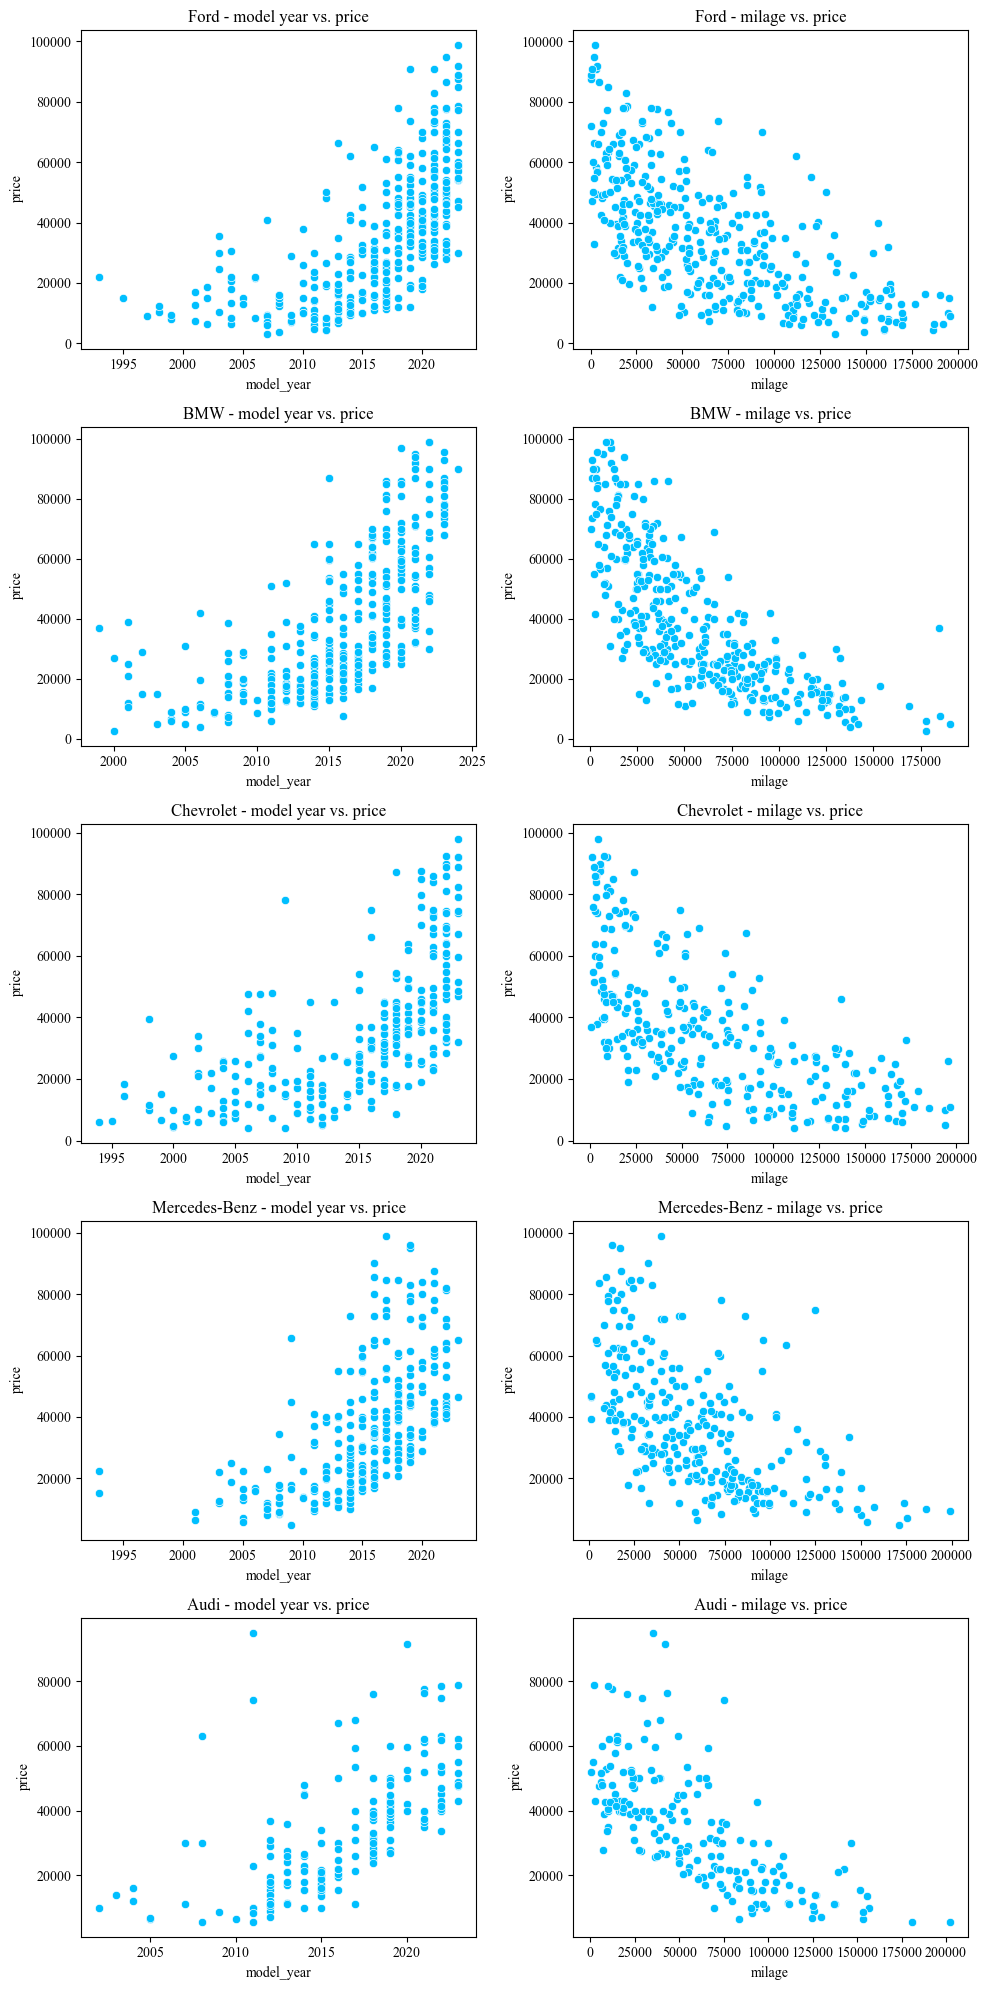

In [19]:

fig, axes = plt.subplots(5,2, figsize=[10,20])
top5_brand = list(df['brand'].value_counts()[:5].index)
for i, b in enumerate(top5_brand):
    sns.scatterplot(data = df[df['brand']==b], x = 'model_year', y = 'price', ax=axes[i,0], color='deepskyblue')
    axes[i,0].set_title('{} - model year vs. price'.format(b))
    sns.scatterplot(data = df[df['brand']==b], x = 'milage', y = 'price', ax=axes[i,1], color='deepskyblue')
    axes[i,1].set_title('{} - milage vs. price'.format(b))
plt.tight_layout()
plt.show()

There is a positive relationship between the model year and price. 

Similarly, higher mileage use leads to a lower price.

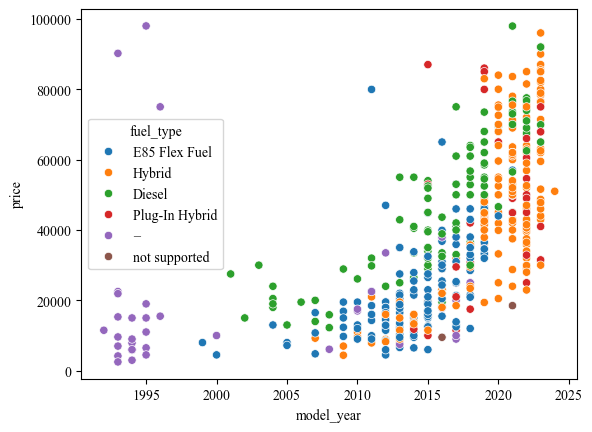

In [20]:
sns.scatterplot(data = df[df['fuel_type']!='Gasoline'], x = 'model_year', y = 'price', hue='fuel_type')
plt.show()

It seems that diesel cars have higher prices compared to others.

(I created plot excluding Gasoline, which is a major fuel source.)

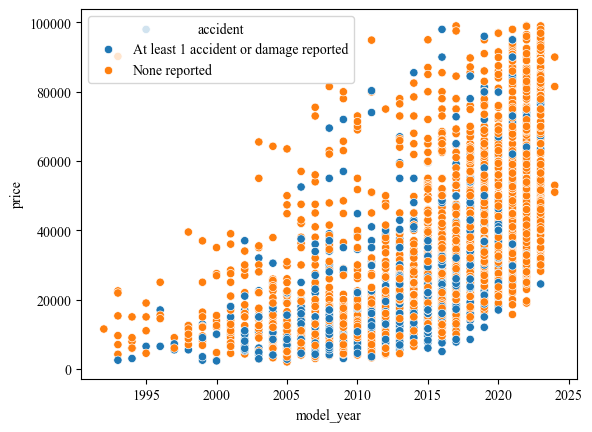

In [21]:
sns.scatterplot(data = df, x = 'model_year', y = 'price', hue='accident')
plt.show()

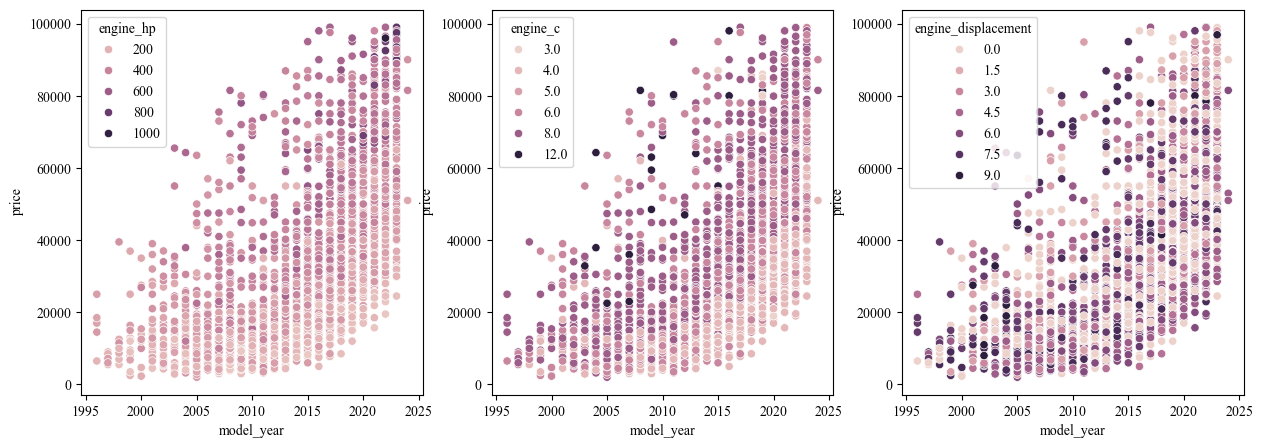

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(data = df, x = 'model_year', y = 'price', hue='engine_hp', ax=ax[0])
sns.scatterplot(data = df, x = 'model_year', y = 'price', hue='engine_c', ax=ax[1])
sns.scatterplot(data = df, x = 'model_year', y = 'price', hue='engine_displacement', ax=ax[2])
plt.show()

Higher horsepower and larger engine cylinder drive higer prices.

### Missing values

In [23]:
df['fuel_type'] = df['fuel_type'].fillna('Electronic') # looks like all null value in fuel_type cars are electronic
df['fuel_type'] = df['fuel_type'].str.replace('–', 'not supported')
df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline          3045
Hybrid             177
Electronic         163
E85 Flex Fuel      135
Diesel             103
not supported       43
Plug-In Hybrid      34
Name: count, dtype: int64

In [24]:
df['accident'] = df['accident'].fillna('Unknown') # As accident info can be critical, I didn't replace null into any other type.
df['accident'].value_counts(dropna=False)

accident
None reported                             2653
At least 1 accident or damage reported     948
Unknown                                     99
Name: count, dtype: int64

In [25]:
df['clean_title'] = df['clean_title'].fillna('Unknown') # Same as accident, I didn't replace null into any other type.
df['clean_title'].value_counts(dropna=False)

clean_title
Yes        3178
Unknown     522
Name: count, dtype: int64

In [26]:
df_model = df[['brand','model_year','milage','fuel_type','ext_col_norm','int_col_norm','accident','clean_title','price','engine_hp','engine_displacement','engine_c']]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3700 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                3700 non-null   object 
 1   model_year           3700 non-null   int64  
 2   milage               3700 non-null   int64  
 3   fuel_type            3700 non-null   object 
 4   ext_col_norm         3700 non-null   object 
 5   int_col_norm         3700 non-null   object 
 6   accident             3700 non-null   object 
 7   clean_title          3700 non-null   object 
 8   price                3700 non-null   int64  
 9   engine_hp            2993 non-null   float64
 10  engine_displacement  3495 non-null   float64
 11  engine_c             3298 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 375.8+ KB


## Train-test split

In [27]:
X = df_model.drop('price', axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 111)
print(len(X_train), len(X_test))

2775 925


In [30]:
X_train.to_csv('/Users/yeong-injang/Desktop/kaggle/Used_cars/used_cars_train.csv', index=False)
X_test.to_csv('/Users/yeong-injang/Desktop/kaggle/Used_cars/used_cars_test.csv', index=False)